#  Feature Scaling

Scaling features in the context of machine learning refers to the process of transforming your input variables (features) so that they all have the same scale or range. This is important for several reasons, and there are different methods to achieve feature scaling.

#### Why Scaling Features is Necessary:

**Different Scales:** Features in your dataset may have different units of measurement or different scales. For example, one feature might measure weight in kilograms, while another measures height in meters. These different scales can cause some machine learning algorithms to perform poorly because they may give too much importance to features with larger scales.

**Gradient Descent:** Many machine learning algorithms, especially those based on gradient descent (e.g., linear regression, neural networks), converge faster when features are on similar scales. If features have significantly different scales, the gradient descent process can be skewed, leading to longer convergence times or convergence to suboptimal solutions.

**Distance-Based Algorithms:** Algorithms that rely on distances between data points, such as k-means clustering or support vector machines, can be sensitive to feature scales. Features with larger scales might dominate the distance calculations, leading to biased results.

**Regularization:** Regularization techniques, like L1 and L2 regularization, can be sensitive to feature scales. In some cases, regularization might unfairly penalize features with larger scales.

#### How to Scale Features:

There are several common methods for scaling features:

**Min-Max Scaling (Normalization):** This method scales features to a specific range, usually [0, 1]. It subtracts the minimum value of the feature from each data point and then divides by the range (the difference between the maximum and minimum values). Min-max scaling preserves the relative relationships between data points.

Formula for Min-Max Scaling:

`X_scaled = (X - X_min) / (X_max - X_min)`

**Standardization (Z-score Scaling):** Standardization transforms features to have a mean of 0 and a standard deviation of 1. It subtracts the mean of the feature from each data point and then divides by the standard deviation. Standardization is less sensitive to outliers compared to min-max scaling.

Formula for Standardization:

`X_scaled = (X - X_mean) / X_std`

**Robust Scaling:** This method is similar to standardization but uses the median and the interquartile range (IQR) instead of the mean and standard deviation. It's less sensitive to outliers because it relies on the median and IQR, which are robust to extreme values.

Formula for Robust Scaling:

`X_scaled = (X - X_median) / IQR`

The choice of scaling method depends on your specific dataset and the requirements of your machine learning algorithm. It's common practice to try different scaling methods and evaluate their impact on your model's performance. 

Some algorithms, like **decision trees and random forests, are not sensitive to feature scales and may not require feature scaling**. However, for many other algorithms, scaling features is an important preprocessing step to improve model performance.

Feature scaling is primarily applied to the feature matrix (X) because it helps algorithms that rely on distance or gradient-based optimization converge more quickly and perform better when features are on a similar scale. 

Typically we do not need to scale the target variable (y) in most machine learning scenarios. The target variable represents the quantity you are trying to predict, and its scale is an inherent part of the problem you are trying to solve. Scaling the target variable doesn't usually provide any meaningful benefits and can even lead to confusion or incorrect interpretations of the model's predictions.

In [11]:
# lets say we have X feature

X=[[1,2,3]]

**It's common practice to try different scaling methods and evaluate their impact on your model's performance.**

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[0., 0., 0.]])

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_X = scaler.fit_transform(X)
standardized_X

array([[0., 0., 0.]])

In [15]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[0., 0., 0.]])

**To train a model and make predictions on the given DataFrame while performing feature scaling, you can follow these steps. We'll use Python with scikit-learn for this task:**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.DataFrame({
    'Car': ['Toyota', 'Mitsubishi', 'Skoda', 'Fiat', 'Mini', 'VW', 'Skoda', 'Mercedes', 'Ford', 'Audi'],
    'Model': ['Aygo', 'Space Star', 'Citigo', '500', 'Cooper', 'Up!', 'Fabia', 'A-Class', 'Fiesta', 'A1'],
    'Volume': [1.0, 1.2, 1.0, 0.9, 1.5, 1.0, 1.4, 1.5, 1.5, 1.6],
    'Weight': [790, 1160, 929, 865, 1140, 929, 1109, 1365, 1112, 1150],
    'CO2': [99, 95, 95, 90, 105, 105, 90, 92, 98, 99]
})

# Split the data into features (X) and target variable (y)
X = data[['Volume', 'Weight']]
y = data['CO2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling (standardization) on the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.852155027526014


In machine learning, **it's a common practice to perform feature scaling on the independent variables (X) rather than the dependent variable (y)**. Feature scaling helps ensure that all the features are on a similar scale, which can be important for many machine learning algorithms. Scaling the dependent variable (y) is typically not necessary, as it's the target variable you're trying to predict, and scaling it may not have a meaningful impact on the model.

In the code I provided, we use `fit_transform()` on the training set and `transform()` on the test set for feature scaling. This approach is a common practice in machine learning, and here's why we do it this way:

**fit_transform() on Training Data:**

When you apply feature scaling to the training data, you use fit_transform(). This step computes and stores the scaling parameters (mean and standard deviation in the case of StandardScaler) based on the training data.

The purpose of this step is to ensure that the scaling parameters are determined solely from the training data and not influenced by the test data.

It scales the training data and returns the scaled version.

**transform() on Test Data:**

After the scaling parameters have been determined from the training data using fit_transform(), you use transform() on the test data.

The scaling parameters (mean and standard deviation) computed from the training data are then applied to the test data.
This ensures that the test data is scaled using the same parameters as the training data, maintaining consistency and preventing data leakage from the test set into the training process.

The approach of using `fit_transform()` on the training data and `transform()` on the test data applies to other scaling methods like `MinMaxScaler` and `RobustScaler` as well. This approach is consistent across various scaling techniques to maintain data integrity and ensure that the scaling parameters are determined based on the training data.

# Categorical data

Handling categorical data is a crucial step in preparing your data for machine learning models, as most machine learning algorithms require numerical input. Here are different ways to handle categorical data:

**One-Hot Encoding (Dummy Variables):**

One-hot encoding is a common method for converting categorical variables into numerical format.

It creates binary columns for each category and assigns a 1 or 0 to indicate the presence or absence of each category.

One-hot encoding is suitable for nominal categorical variables (categories without inherent order).
Example:

<pre>
| Color |
|-------|
| Red   |
| Blue  |
| Green |

After one-hot encoding:
| Color_Red | Color_Blue | Color_Green |
|-----------|------------|-------------|
| 1         | 0          | 0           |
| 0         | 1          | 0           |
| 0         | 0          | 1           |
</pre>

**Label Encoding:**

Label encoding assigns a unique integer value to each category in a categorical variable.

It is suitable for ordinal categorical variables (categories with a specific order).

Be cautious when using label encoding with nominal variables, as it may imply an ordinal relationship that doesn't exist.
Example:

<pre>
| Size   |
|--------|
| Small  |
| Medium |
| Large  |

After label encoding:
| Size  |
|-------|
| 0     |
| 1     |
| 2     |
</pre>

**Frequency Encoding (Count Encoding):**

Frequency encoding replaces each category with its frequency or count in the dataset.

It can capture the importance of each category based on its prevalence in the data.
Example:

<pre>
| Country |
|---------|
| USA     |
| Japan   |
| USA     |
| Germany |
| Japan   |

After frequency encoding:
| Country |
|---------|
| 2       |
| 2       |
| 2       |
| 1       |
| 2       |
</pre>

**Target Encoding (Mean Encoding):**

Target encoding calculates the mean of the target variable for each category and replaces the category with its corresponding mean.

It can be useful when the categorical variable has a strong relationship with the target variable.
Example:

<pre>
| City   | Target |
|--------|--------|
| NYC    | 25     |
| Boston | 20     |
| NYC    | 25     |
| LA     | 18     |
| Boston | 20     |

After target encoding:
| City   | Target |
|--------|--------|
| 23.3   | 23.3   |
| 20.0   | 20.0   |
| 23.3   | 23.3   |
| 19.0   | 19.0   |
| 20.0   | 20.0   |
</pre>

**Binary Encoding:**

Binary encoding converts each category into binary code and creates separate binary columns for each digit in the code.
It can be more efficient than one-hot encoding when dealing with a large number of categories.
Example:

<pre>
| Gender |
|--------|
| Male   |
| Female |
| Male   |
| Other  |

After binary encoding:
| Gender_0 | Gender_1 | Gender_2 |
|----------|----------|----------|
| 0        | 1        | 0        |
| 1        | 0        | 1        |
| 0        | 1        | 0        |
| 1        | 1        | 0        |
</pre>

**Embedding Layers (for Neural Networks):**

In deep learning and neural networks, you can use embedding layers to learn representations of categorical variables.
Embedding layers map each category to a lower-dimensional vector space where relationships between categories can be learned during model training.


These are some common techniques for handling categorical data, and the choice of method depends on the nature of the data and the requirements of your machine learning model. It's essential to select the appropriate method to avoid introducing bias or misrepresenting the information contained in your categorical variables.

In [17]:
# One-Hot Encoding

import pandas as pd

data = pd.DataFrame({'Color': ['Red', 'Blue', 'Green']})

# Use pandas' get_dummies() function for one-hot encoding
one_hot_encoded = pd.get_dummies(data, columns=['Color'])
print(one_hot_encoded)

   Color_Blue  Color_Green  Color_Red
0           0            0          1
1           1            0          0
2           0            1          0


In [2]:
# Label Encoding:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.DataFrame({'Size': ['Small', 'Medium', 'Large']})

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Size' column
data['Size_encoded'] = label_encoder.fit_transform(data['Size'])
data

,Size,Size_encoded
0,Small,2
1,Medium,1
2,Large,0


In [19]:
# Frequency Encoding (Count Encoding):

data = pd.DataFrame({'Country': ['USA', 'Japan', 'USA', 'Germany', 'Japan']})

# Use value_counts() to create a frequency encoding dictionary
frequency_encoding = data['Country'].value_counts().to_dict()

# Map the frequency encoding to the 'Country' column
data['Country_encoded'] = data['Country'].map(frequency_encoding)
print(data)

   Country  Country_encoded
0      USA                2
1    Japan                2
2      USA                2
3  Germany                1
4    Japan                2


In [20]:
# Target Encoding (Mean Encoding):

data = pd.DataFrame({'City': ['NYC', 'Boston', 'NYC', 'LA', 'Boston'], 'Target': [25, 20, 25, 18, 20]})

# Calculate the mean encoding for each category in 'City'
mean_encoding = data.groupby('City')['Target'].mean().to_dict()

# Map the mean encoding to the 'City' column
data['City_encoded'] = data['City'].map(mean_encoding)
print(data)

     City  Target  City_encoded
0     NYC      25          25.0
1  Boston      20          20.0
2     NYC      25          25.0
3      LA      18          18.0
4  Boston      20          20.0


In [23]:
# Binary Encoding:

import category_encoders as ce

data = pd.DataFrame({'Gender': ['Male', 'Female', 'Male', 'Other']})

# Initialize BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=['Gender'])

# Apply binary encoding to the 'Gender' column
binary_encoded = binary_encoder.fit_transform(data)
print(binary_encoded)

   Gender_0  Gender_1
0         0         1
1         1         0
2         0         1
3         1         1


https://medium.com/geekculture/how-to-handle-categorical-variables-7c1ee198c55c#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjZmNzI1NDEwMWY1NmU0MWNmMzVjOTkyNmRlODRhMmQ1NTJiNGM2ZjEiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJhdWQiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJzdWIiOiIxMDU4NjAxMzc4MDc0MzU5MDI0NDUiLCJlbWFpbCI6InNhdXJhYmhwODUwNzBAZ21haWwuY29tIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsIm5iZiI6MTY5NTQwMjE2MiwibmFtZSI6IlNhdXJhYmggUHJha2FzaCIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS9BQ2c4b2NJWnlscWwwRWxBRWxNcDFHVUl2VndKUDUyUjQzY0RuRUc0Q3BsS3JEYi1tQT1zOTYtYyIsImdpdmVuX25hbWUiOiJTYXVyYWJoIiwiZmFtaWx5X25hbWUiOiJQcmFrYXNoIiwibG9jYWxlIjoiZW4iLCJpYXQiOjE2OTU0MDI0NjIsImV4cCI6MTY5NTQwNjA2MiwianRpIjoiNmJjYTQ0M2RlYTM5MzAwODJlYWFjODRkYzliYjM1MzMzMzdjM2E0ZiJ9.eE2DQPbFgl8bhqgO6cV0a2GUP3ER0M_X7v6ff3AS9CByrK8NxF5Ov4aP925uYw4n9kC_QKnqT6g8Ay60aOvJx6IoXtA7w-nEU2WT56W5VT-7Cf0h_6W8uwv-64kjb8y8BtoNcoV75SAI5Qaf-N8iOGqr08DgXS9ilxgfaoOuByh_gWzWVxu5sZ-qyBT5m5oOIca0-zRKe3f0yKmU7dTV6Ax06npdwF22vJAvlxcaczMmiiueckL-500z5JUlmWDGHqdz16qn3sxMQe1KasrDvdGDBur9DIohgUdo2Onritu-E4VlUMKHxFnU-2OmhQcBTKXF4I79zJYfzcuzPtmOyA



https://medium.com/big-data-center-of-excellence/how-to-handle-categorical-values-byaryan-a769b2bb4361

https://towardsdatascience.com/handling-categorical-data-the-right-way-9d1279956fc6

https://www.datacamp.com/tutorial/categorical-data

https://dev.to/anurag629/transforming-categorical-data-a-practical-guide-to-handling-non-numerical-variables-for-machine-learning-algorithms-cld

**Handling categorical data can be done both before and after data visualization, and the choice depends on your specific goals and the nature of your data. Here are some considerations for when to handle categorical data in relation to data visualization:**

1. Before Data Visualization:

Data Preparation: It's common to handle categorical data before visualization as part of the data preprocessing step. This includes tasks like one-hot encoding, label encoding, or any other method to convert categorical variables into a numerical format.

Visualization Clarity: By preprocessing categorical data before visualization, you can create visualizations that are more interpretable and informative. For example, one-hot encoding can make it easier to create bar charts or other plots that show the distribution of categories.

Dimension Reduction: Some visualization techniques may require dimensionality reduction methods like Principal Component Analysis (PCA) or t-SNE. Handling categorical data before such techniques can be necessary to avoid issues associated with mixed data types.

Data Exploration: Categorical encoding can help you understand the relationships between categorical variables and the target variable or among themselves, which can guide the choice of visualizations.

2. After Data Visualization:

Exploratory Data Analysis (EDA): In some cases, you might initially perform data visualization to explore the dataset and understand the relationships between variables. After EDA, you can decide how to handle categorical data based on insights gained from visualizations.

Visualization for Encoding Choices: Visualization can help you make informed decisions about how to encode categorical variables. For example, you may discover that one-hot encoding is appropriate for variables with few unique categories, while other encoding methods may be better suited for variables with many categories.

Visualizing Encoding Impact: You might want to visualize the impact of different encoding methods on your data, such as comparing the distribution of a target variable before and after encoding.

In summary, there is no strict rule about whether to handle categorical data before or after data visualization. The choice depends on your analysis workflow and objectives. However, it's common to start with some data preprocessing before visualization to ensure that the visualizations accurately represent the data and that you can derive meaningful insights from them. Subsequent visualizations may then inform further data preprocessing decisions. Ultimately, the goal is to strike a balance between data preparation and exploration to gain a deep understanding of your dataset.

**When you have a dataset that contains a mix of categorical and numerical features, and you want to apply feature scaling to the numerical features, a common approach is to use a combination of techniques, such as one-hot encoding for categorical features and feature scaling for numerical features. Here's a step-by-step approach:**

Identify Categorical and Numerical Features:

Start by identifying which features in your dataset are categorical (nominal or ordinal) and which are numerical (continuous or discrete).
Preprocess Categorical Features (One-Hot Encoding):

For categorical features, you can use one-hot encoding to convert them into a numerical format that machine learning algorithms can work with.
One-hot encoding creates binary columns for each category within a categorical feature. Each binary column represents the presence or absence of a category for a particular data point.
Example: If you have a "Color" feature with categories ["Red", "Green", "Blue"], one-hot encoding would create three binary columns, one for each color.
Preprocess Numerical Features (Feature Scaling):

For numerical features, it's a good practice to apply feature scaling to ensure that all numerical features have a similar scale. Common scaling techniques include:
Standardization (Z-score scaling): Scales the data to have a mean of 0 and a standard deviation of 1. It's suitable for features that are approximately normally distributed.
Min-Max Scaling (Normalization): Scales the data to a specific range, typically between 0 and 1. It's suitable when the feature distribution does not follow a normal distribution and you want to preserve the original data's relationships.
Robust Scaling: Scales data based on the median and interquartile range, making it robust to outliers.
Concatenate Scaled Numerical Features and Encoded Categorical Features:

After scaling the numerical features and one-hot encoding the categorical features, you can concatenate these processed features into a single feature matrix.
Model Training and Evaluation:

You can now use this processed dataset for training your machine learning model. Ensure that you split your data into training and testing sets for model evaluation.
Here's an example of how you can implement this approach using Python and libraries like Pandas and Scikit-Learn:

In [ ]:
# Pseudo code


import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Load your dataset into a Pandas DataFrame
# df = pd.read_csv('your_dataset.csv')

# Identify categorical and numerical features
categorical_features = ['Category1', 'Category2']
numerical_features = ['Numerical1', 'Numerical2']

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # You can use other scalers as needed
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Define your model and combine it with preprocessing using a Pipeline

# Split data into training and testing sets
X = df.drop('target_column', axis=1)
y = df['target_column']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessing and model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
score = model.score(X_test, y_test)


we used `Pipeline()` and `ColumnTransformer()` for structured and efficient data preprocessing. Here's why each of these tools is valuable:

`Pipeline()`:

- A Pipeline is a way to streamline a lot of the routine processes by combining multiple data preprocessing steps and a machine learning model into a single, easy-to-use object.
- It helps ensure that the steps of data preprocessing are applied in the correct order. In machine learning workflows, it's common to first preprocess data (e.g., scaling and encoding) and then apply a model. A Pipeline enforces this sequence.
- It simplifies the code and reduces the risk of data leakage. For example, when you scale your data, you should fit the scaler on the training data and then transform both the training and testing data. A Pipeline automates this process.
- Makes it easier to cross-validate your model. When using cross-validation techniques, a Pipeline ensures that preprocessing steps are applied consistently to each fold of the data.

`ColumnTransformer()`:

- A ColumnTransformer is particularly useful when you have a dataset with different types of features (e.g., categorical and numerical) that require different preprocessing techniques.
- It allows you to apply different preprocessing pipelines to different subsets of columns in your dataset.
- In the example given, we used ColumnTransformer to apply one-hot encoding to the categorical features and standard scaling to the numerical features.
- This approach keeps the code organized and makes it clear which preprocessing steps apply to which types of features.

In summary, using Pipeline and ColumnTransformer together offers a structured and efficient way to preprocess data with multiple feature types, ensuring that the correct transformations are applied to each feature subset while simplifying the code and making it more maintainable. This is especially helpful in machine learning workflows where consistency and repeatability are essential.

**You can certainly use an approach where you first separate the categorical and numerical features into two dataframes, apply feature scaling to the numerical dataframe (df2), and one-hot encoding to the categorical dataframe (df1). Afterward, you can combine them back into a single dataframe (df) for model training and evaluation. This approach can be conceptually easier to follow and maintain.**

Here's how you can implement this approach:

In [ ]:
# Pseudo code

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Load your dataset into a Pandas DataFrame
# df = pd.read_csv('your_dataset.csv')

# Identify categorical and numerical features
categorical_features = ['Category1', 'Category2']
numerical_features = ['Numerical1', 'Numerical2']

# Create dataframes for categorical and numerical features
df1 = df[categorical_features]
df2 = df[numerical_features]

# Apply preprocessing to df1 (categorical features)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
df1_processed = categorical_transformer.fit_transform(df1)

# Apply preprocessing to df2 (numerical features)
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # You can use other scalers as needed
])
df2_processed = numerical_transformer.fit_transform(df2)

# Combine df1 and df2 back into a single dataframe (df)
df_processed = pd.concat([pd.DataFrame(df1_processed.toarray()), pd.DataFrame(df2_processed, columns=numerical_features)], axis=1)

# Define your model and combine it with preprocessing using a Pipeline

# Split data into training and testing sets
X = df_processed
y = df['target_column']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessing and model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
score = model.score(X_test, y_test)


**Certainly, you can achieve the same preprocessing without using Pipeline and keep it simple. You can separately apply feature scaling to numerical features and one-hot encoding to categorical features, and then combine them into a single dataframe. Here's how you can do it:**

In [ ]:
# Pseudo code

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load your dataset into a Pandas DataFrame
# df = pd.read_csv('your_dataset.csv')

# Identify categorical and numerical features
categorical_features = ['Category1', 'Category2']
numerical_features = ['Numerical1', 'Numerical2']

# Create dataframes for categorical and numerical features
df1 = df[categorical_features]
df2 = df[numerical_features]

# Apply one-hot encoding to df1 (categorical features)
encoder = OneHotEncoder(handle_unknown='ignore')
df1_encoded = encoder.fit_transform(df1)

# Apply feature scaling to df2 (numerical features)
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

# Combine df1_encoded and df2_scaled back into a single dataframe (df)
df_processed = pd.concat([pd.DataFrame(df1_encoded.toarray()), pd.DataFrame(df2_scaled, columns=numerical_features)], axis=1)

# Define your model and use df_processed for training and evaluation

# Split data into training and testing sets
X = df_processed
y = df['target_column']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
score = model.score(X_test, y_test)


**The choice between using a Pipeline or not depends on your specific needs, preferences, and the complexity of your data preprocessing workflow. Both approaches are valid and have their advantages and disadvantages:**

`With Pipeline`:

Advantages:

- Structured Workflow: Using a Pipeline enforces a structured and sequential workflow for data preprocessing. This can make your code more organized and easier to follow.

- Data Leakage Prevention: A Pipeline helps prevent data leakage by ensuring that preprocessing steps are applied consistently to both the training and testing datasets.

- Cross-Validation: When using cross-validation techniques, a Pipeline ensures that preprocessing is part of each fold, making cross-validation results more reliable.

- Reusability: Pipelines are reusable components. Once you define a pipeline, you can use it on different datasets or with different models with minimal code changes.

Disadvantages:

- Complexity: For simple preprocessing tasks, a Pipeline might be overkill and add unnecessary complexity to your code.

`Without Pipeline`:

Advantages:

- Simplicity: Without a Pipeline, your code can be simpler and easier to understand, especially for straightforward preprocessing tasks.

- Control: You have more fine-grained control over each preprocessing step, which can be beneficial if you need to customize or modify individual steps.

- Transparency: It's easier to see and modify each preprocessing step separately.

Disadvantages:

- Potential for Data Leakage: Without a Pipeline, you must be careful to apply preprocessing consistently to both training and testing data to avoid data leakage.

- Maintenance: As your preprocessing steps grow more complex, the code may become harder to maintain and extend.

In conclusion, the best approach depends on the complexity of your data and your specific requirements. For simple preprocessing tasks, a straightforward approach without a Pipeline can be more concise and easier to work with. However, for more complex workflows, or when working on projects where data consistency and reproducibility are critical, using a Pipeline is often recommended. Ultimately, the choice between the two approaches should align with the goals of your data preprocessing and modeling tasks.

# Statisitical Analysis  

- Statistical analysis involves the collection, organization, analysis, interpretation, and presentation of data. 
- It aims to uncover patterns, trends, relationships, and insights within the data. 
- Statistical analysis employs various statistical techniques and methods to summarize and describe data, make inferences about populations based on samples, and test hypotheses. 
- It provides a framework for making informed decisions and predictions based on data evidence. 
- Statistical analysis is crucial in extracting meaningful information from data and understanding the underlying phenomena.

# Statistical modelling

- Statistical modeling is a process of building mathematical models to represent and understand the relationships between variables in data. 
- These models are constructed based on statistical principles and techniques. 
- Statistical models can be descriptive, predictive, or inferential in nature. 
        - Descriptive models summarize the characteristics of data. 
        - Predictive models aim to forecast or estimate future outcomes. 
        - Inferential models are used to make inferences or draw conclusions about populations based on sample data. 
- Statistical modeling involves selecting an appropriate model, estimating model parameters from data, evaluating model performance, and making interpretations or predictions based on the model results. 
- It plays a fundamental role in various fields such as economics, finance, biology, social sciences, and many others, providing insights into complex phenomena and aiding decision-making processes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [2]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [6]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [8]:
# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y
pca_df

,PC1,PC2,Target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


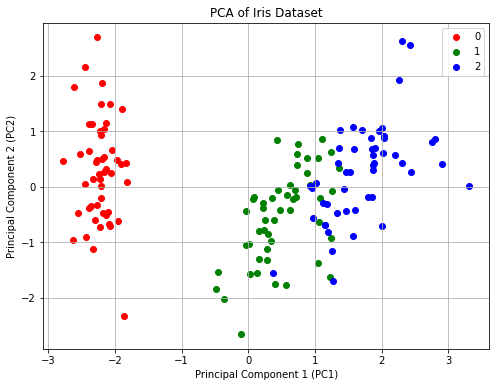

Explained Variance Ratio: [0.72962445 0.22850762]


In [9]:
# Visualize the PCA results
plt.figure(figsize=(8, 6))
targets = np.unique(y)
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices_to_keep = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'PC1'],
                pca_df.loc[indices_to_keep, 'PC2'],
                c=color,
                label=target)
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA of Iris Dataset')
plt.legend(targets)
plt.grid(True)
plt.show()

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
